# OpenML Datasets

In [1]:
!pip install -U pip numpy pandas jupyter
!pip install -U openml
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\nanos\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nanos\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\nanos\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Authentication

You first need to find your API key.

* Create an OpenML account (free) on http://www.openml.org. 
* Log in, click your avatar/picture, open 'API authentication'.
* Your API key is a secret 32-character string

You can copy this API key into your code (but only if you never share it):

In [3]:
# Uncomment and set your OpenML key. 
import openml as oml
# Replace the foloowing string with yout API key
oml.config.apikey = '5ffe699b268a9320e6d7daae89758124'

In [4]:
# Making sure we are using the right settings
oml.config.server = 'https://www.openml.org/api/v1/xml' 
oml.config.apikey = '5ffe699b268a9320e6d7daae89758124'
# Suppress sklearn warnings
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)

## Import Dataset

`datasets.get_dataset(data_id)` returns an `OpenMLData` object with the dataset and meta-data.

In [5]:
# This is done based on the dataset ID.
# Replace with yours

dataset = oml.datasets.get_dataset(40670)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[::])

This is dataset 'dna', the target feature is 'class'
URL: https://www.openml.org/data/v1/download/4965245/dna.arff
**Author**: Ross King, based on data from Genbank 64.1  

**Source**: [MLbench](https://www.rdocumentation.org/packages/mlbench/versions/2.1-1/topics/DNA). Originally from the StatLog project.  

**Please Cite**:   



**Primate Splice-Junction Gene Sequences (DNA)**  

Originally from the StatLog project. The raw data is still available on [UCI](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+(Splice-junction+Gene+Sequences)).



The data consists of 3,186 data points (splice junctions). The data points are described by 180 indicator binary variables and the problem is to recognize the 3 classes (ei, ie, neither), i.e., the boundaries between exons (the parts of the DNA sequence retained after splicing) and introns (the parts of the DNA sequence that are spliced out). The StatLog DNA dataset is a processed version of the [Irvine database]((https://archive.ics.uc

#### Get the data itself
`OpenMLData.getdata()` returns the actual data as numpy arrays. 

In [6]:
import pandas as pd

X_train, y_train, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)
eeg = pd.DataFrame(X_train, columns=attribute_names)
eeg["class"] = y_train
print(eeg[:10])
#print(eeg[::])

    A0   A1   A2   A3   A4   A5   A6   A7   A8   A9  ...  A171  A172  A173  \
0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   1.0   0.0   0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   0.0   1.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   0.0   0.0   1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   0.0   1.0   0.0   
5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...   0.0   0.0   1.0   
6  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   1.0   0.0   0.0   
7  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   1.0   0.0   0.0   
8  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   1.0   0.0   0.0   
9  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...   1.0   0.0   0.0   

   A174  A175  A176  A177  A178  A179  class  
0   0.0   0.0   1.0   1.0   0.0   0.0      2  
1   1.0   0.0   0.0   0.0   1.0   0.0      2  


#### Get the meta-data
Every dataset comes with rich meta-data:
* name, version, date, creator, licence, description, ...
* `dataset.qualities` returns 100+ statistical data properties
* `dataset.features` returns all variables and their data types
* tags added by the OpenML community

## Further information
That's it. You are now an expert in using OpenML. In case you have further questions:

[OpenML Documentation](https://docs.openml.org)  
[Python API Documentation and examples](https://openml.github.io/openml-python)

The dataset consists of 3186 dna splice junctions. Each splice junction is described by 180 binary variables corresponding to 60 nucleotides (A, G, T, C). 
- Exons are nucleotide sequences in DNA and RNA that are conserved in mature RNA generation after the splicing process.

- Introns are nucleotide sequences in DNA and RNA that do not directly encode proteins and are removed during the precursor messenger RNA (pre-mRNA) mRNA stage by RNA splicing..

The problem is the recognition of the three classes
- None 
- Exons
- Introns

Ο συμβολισμός των νουκλεοτιδίων είναι (A,G,T,C):

    A -> 1 0 0

    C -> 0 1 0

    G -> 0 0 1

    T -> 0 0 0

In [7]:
eeg.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A171,A172,A173,A174,A175,A176,A177,A178,A179,class
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1


In [8]:
print("Number of data samples is : ", len(eeg))
print("Number of characteristics of each sample is ", len(eeg.iloc[0]))
print("There exist {} classes in column {} of the dataset ".format(len (np.unique(eeg.iloc[:, len(eeg.iloc[0]) - 1])), len(eeg.iloc[0]) -1))
print("The labels of the classes are : {}" .format(np.unique(eeg.iloc[:, len(eeg.iloc[0]) - 1])))

Number of data samples is :  3186
Number of characteristics of each sample is  181
There exist 3 classes in column 180 of the dataset 
The labels of the classes are : [0 1 2]


Checking for missing data

In [9]:
# Total missing values
total = eeg.isnull().sum(axis=1)

# Percent Missing
percent = (eeg.isnull().sum(axis=1)/eeg.isnull().count(axis=1)*100)

missing_data  = pd.concat([total, percent], axis=1, keys=["Total missing", "Percent missing"])

missing_data

,Total missing,Percent missing
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
3181,0,0.0
3182,0,0.0
3183,0,0.0
3184,0,0.0


In [10]:
for i in range(len (np.unique(eeg.iloc[:, len(eeg.iloc[0]) - 1]))):
    print("Class {} appers : {} times, with frequency {} %".format (i, np.count_nonzero(eeg.iloc[:, len(eeg.iloc[0]) - 1] == i), np.count_nonzero(eeg.iloc[:, len(eeg.iloc[0]) - 1] == i)/len(eeg) * 100))

Class 0 appers : 767 times, with frequency 24.074074074074073 %
Class 1 appers : 765 times, with frequency 24.01129943502825 %
Class 2 appers : 1654 times, with frequency 51.914626490897675 %



With the above frequency results for each class we can conclude that the dataset is not balanced

## __Preprocessing__
- Split the data set into a training set (train set) and a set (test set) with 30% of the samples in the test set

In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# __Performance out-of-the-box__

## __dummy()__

In [12]:
dummy = DummyClassifier().fit(X_train, y_train) 

pred_dummy = dummy.predict(X_test) 
  
accuracy_dummy = dummy.score(X_test, y_test) * 100 
print("Dummy Accuracy: {}% \n".format(accuracy_dummy))

Dummy Accuracy: 50.10460251046025% 



## __GaussianNB()__

In [14]:
gnb = GaussianNB().fit(X_train, y_train) 

pred_gnb = gnb.predict(X_test) 
  
accuracy_gnb = gnb.score(X_test, y_test) *100 
print("GaussianNB Accuracy: {}% \n".format(accuracy_gnb))

GaussianNB Accuracy: 94.35146443514645% 



## __Confusion Matrix and Classification Report of GaussianNB()__

[[0.97560976 0.01626016 0.00813008]
 [0.03030303 0.94372294 0.02597403]
 [0.03966597 0.03340292 0.92693111]]


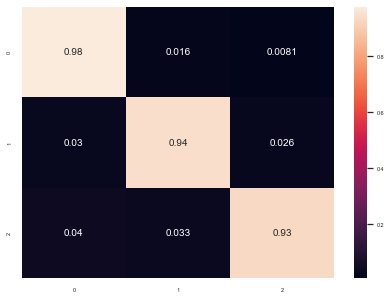

In [15]:
cm = confusion_matrix(y_test, pred_gnb) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [16]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_gnb, target_names=target_names))
print()

f1_gnb = f1_score(y_test, pred_gnb, average='macro')
cross_val_gnb = np.mean(cross_val_score(gnb, X_train, y_train, cv=10))*100
print('F1-score is :', f1_gnb)
print('Cross validation score is :', cross_val_gnb)

              precision    recall  f1-score   support

     class 0       0.90      0.98      0.94       246
     class 1       0.92      0.94      0.93       231
     class 2       0.98      0.93      0.95       479

    accuracy                           0.94       956
   macro avg       0.93      0.95      0.94       956
weighted avg       0.95      0.94      0.94       956


F1-score is : 0.9403168769471653
Cross validation score is : 93.54260089686099


## __KNeighborsClassifier()__

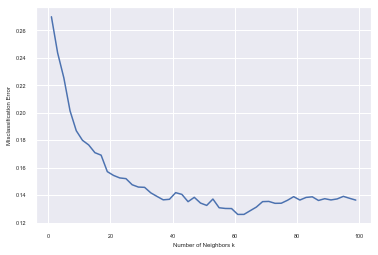

Optimal k is:  61
KNN Accuracy: 85.98326359832636%


In [17]:
# training a KNN classifier 
myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2!=0, myList))
cv_scores = []
for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='f1_macro')
    cv_scores.append(scores.mean())
    
mean_error = [1-x for x in cv_scores]

plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

optimal_k = neighbors[mean_error.index(min(mean_error))]
print('Optimal k is: ', optimal_k)

knn_model = KNeighborsClassifier(n_neighbors = optimal_k, n_jobs=-1)
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_knn)*100
print("KNN Accuracy: {}%".format(accuracy_knn))

## __Confusion Matrix and Classification Report of KNeighborsClassifier()__

[[0.78455285 0.12601626 0.08943089]
 [0.01298701 0.96103896 0.02597403]
 [0.03131524 0.11899791 0.84968685]]


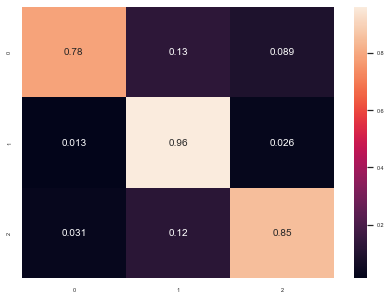

In [18]:
cm = confusion_matrix(y_test, pred_knn) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [19]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_knn, target_names=target_names))
print()

f1_knn = f1_score(y_test, pred_knn, average='macro')
cross_val_knn = np.mean(cross_val_score(knn_model, X_train, y_train, cv=10))*100
print('F1-score is :', f1_knn)
print('Cross validation score is :', cross_val_knn)

              precision    recall  f1-score   support

     class 0       0.91      0.78      0.84       246
     class 1       0.72      0.96      0.82       231
     class 2       0.94      0.85      0.89       479

    accuracy                           0.86       956
   macro avg       0.86      0.87      0.85       956
weighted avg       0.88      0.86      0.86       956


F1-score is : 0.8519773874190891
Cross validation score is : 88.47533632286995


## __LogisticRegression()__

In [20]:
with ignore_warnings(category=ConvergenceWarning):

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train) 
    pred_logreg = logreg.predict(X_test) 
    accuracy_logreg = logreg.score(X_test, y_test) * 100
    print("LogisticRegression Accuracy: {}%".format(accuracy_logreg))

LogisticRegression Accuracy: 94.6652719665272%


## __Confusion Matrix and Classification Report of LogisticRegression()__

[[0.96341463 0.02845528 0.00813008]
 [0.03896104 0.92640693 0.03463203]
 [0.01670146 0.03549061 0.94780793]]


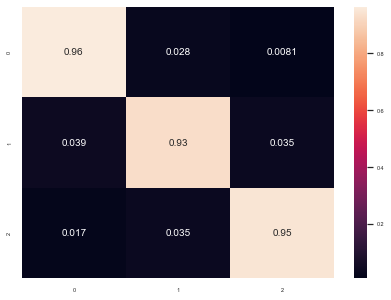

In [21]:
cm = confusion_matrix(y_test, pred_logreg) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [22]:
with ignore_warnings(category=ConvergenceWarning):
    target_names = ['class 0','class 1','class 2']
    print(classification_report(y_test, pred_logreg, target_names=target_names))
    print()

    f1_logreg = f1_score(y_test, pred_logreg, average='macro')
    cross_val_logreg = np.mean(cross_val_score(logreg, X_train, y_train, cv=10))*100
    print('F1-score is :', f1_logreg)
    print('Cross validation score is :', cross_val_logreg)

              precision    recall  f1-score   support

     class 0       0.93      0.96      0.95       246
     class 1       0.90      0.93      0.91       231
     class 2       0.98      0.95      0.96       479

    accuracy                           0.95       956
   macro avg       0.94      0.95      0.94       956
weighted avg       0.95      0.95      0.95       956


F1-score is : 0.9411547896029623
Cross validation score is : 93.76681614349775


## __MLPClassifier()__

In [23]:
MLP_model = MLPClassifier()
MLP_model.fit(X_train, y_train)

pred_mlp = MLP_model.predict(X_test) 

accuracy_mlp = MLP_model.score(X_test, y_test) * 100
print("MLP Accuracy: {}%".format(accuracy_mlp))

MLP Accuracy: 94.76987447698745%


## __Confusion Matrix and Classification Report of MLPClassifier()__

[[0.95121951 0.04065041 0.00813008]
 [0.03463203 0.93939394 0.02597403]
 [0.02087683 0.02922756 0.94989562]]


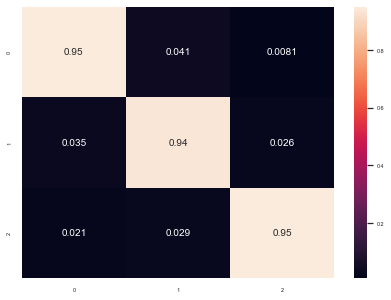

In [24]:
cm = confusion_matrix(y_test, pred_mlp) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [25]:
with ignore_warnings(category=ConvergenceWarning):
    target_names = ['class 0','class 1','class 2']
    print(classification_report(y_test, pred_mlp, target_names=target_names))
    print()

    f1_mlp = f1_score(y_test, pred_mlp, average='macro')
    cross_val_mlp = np.mean(cross_val_score(MLP_model, X_train, y_train, cv=10))*100
    print('F1-score is :', f1_mlp)
    print('Cross validation score is :', cross_val_mlp)

              precision    recall  f1-score   support

     class 0       0.93      0.95      0.94       246
     class 1       0.90      0.94      0.92       231
     class 2       0.98      0.95      0.97       479

    accuracy                           0.95       956
   macro avg       0.94      0.95      0.94       956
weighted avg       0.95      0.95      0.95       956


F1-score is : 0.9417600951866049
Cross validation score is : 94.48430493273543


## __SVMClassifiers()__

In [26]:
svm_lin = SVC(kernel="linear", probability=True)  
svm_lin.fit(X_train, y_train)

svm_rbf = SVC(kernel="rbf", probability=True)  
svm_rbf.fit(X_train, y_train)

svm_poly = SVC(kernel="poly", probability=True)  
svm_poly.fit(X_train, y_train)

svm_sigm = SVC(kernel="sigmoid", probability=True) 
svm_sigm.fit(X_train, y_train)

print("Accuracy of SVM classifier, considering different kernels")
print()

print("Kernel = linear: " + str(svm_lin.score(X_test, y_test)))
print("Kernel = rbf: " + str(svm_rbf.score(X_test, y_test)))
print("Kernel = poly: " + str(svm_poly.score(X_test, y_test)))
print("Kernel = sigmoid: " + str(svm_sigm.score(X_test, y_test)))

Accuracy of SVM classifier, considering different kernels

Kernel = linear: 0.9351464435146444
Kernel = rbf: 0.9612970711297071
Kernel = poly: 0.9414225941422594
Kernel = sigmoid: 0.9372384937238494


## __RBF SVMClassifier()__

In [27]:
svm_model = SVC(probability=True)

svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, pred_svm)*100
print("SVM Accuracy: {}%".format(accuracy_svm))

SVM Accuracy: 96.1297071129707%


## __Confusion Matrix and Classification Report of RBF SVMClassifier()__

[[0.96341463 0.03252033 0.00406504]
 [0.02597403 0.95670996 0.01731602]
 [0.01878914 0.01878914 0.96242171]]


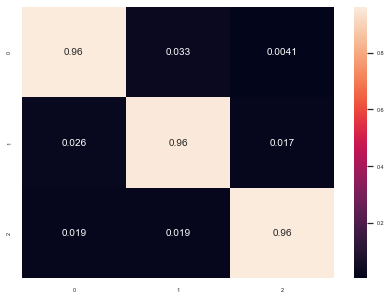

In [28]:
cm = confusion_matrix(y_test, pred_svm) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [29]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm, target_names=target_names))
print()

f1_svm = f1_score(y_test, pred_svm, average='macro')
cross_val_svm = np.mean(cross_val_score(svm_model, X_train, y_train, cv=10))*100
print('F1-score is :', f1_svm)
print('Cross validation score is :', cross_val_svm)

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       246
     class 1       0.93      0.96      0.94       231
     class 2       0.99      0.96      0.98       479

    accuracy                           0.96       956
   macro avg       0.95      0.96      0.96       956
weighted avg       0.96      0.96      0.96       956


F1-score is : 0.956633102733924
Cross validation score is : 95.91928251121077


## __Linear SVMClassifier()__

In [30]:
#SVM Linear
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

pred_svm_lin = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy_svm_lin = svm_model_linear.score(X_test, y_test) * 100
print("SVM Linear Accuracy: {}%".format(accuracy_svm_lin))

SVM Linear Accuracy: 93.51464435146444%


## __Confusion Matrix and Classification Report of Linear SVMClassifier()__

[[0.94715447 0.02845528 0.02439024]
 [0.05194805 0.90909091 0.03896104]
 [0.02713987 0.03131524 0.94154489]]


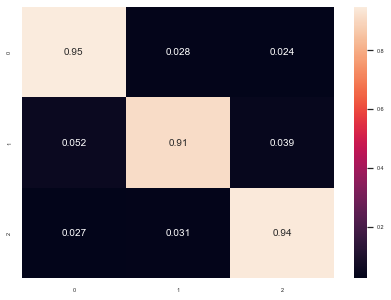

In [31]:
cm = confusion_matrix(y_test, pred_svm_lin) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [32]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm_lin, target_names=target_names))
print()

f1_svm_linear = f1_score(y_test, pred_svm_lin, average='macro')
cross_val_svm_linear = np.mean(cross_val_score(svm_model_linear, X_train, y_train, cv=10))*100
print('F1-score is :', f1_svm_linear)
print('Cross validation score is :', cross_val_svm_linear)

              precision    recall  f1-score   support

     class 0       0.90      0.95      0.92       246
     class 1       0.91      0.91      0.91       231
     class 2       0.97      0.94      0.95       479

    accuracy                           0.94       956
   macro avg       0.93      0.93      0.93       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.9287426529687149
Cross validation score is : 90.98654708520179



# __Poly SVMClassifier()__

In [33]:
svm_model_poly = SVC(kernel='poly').fit(X_train, y_train) 

pred_svm_poly = svm_model_poly.predict(X_test) 
  
accuracy_svm_poly = svm_model_poly.score(X_test, y_test) * 100
print("SVM Poly Accuracy: {}%".format(accuracy_svm_poly))

SVM Poly Accuracy: 94.14225941422593%


## __Confusion Matrix and Classification Report of Poly SVMClassifier()__

[[0.91869919 0.03658537 0.04471545]
 [0.02164502 0.94372294 0.03463203]
 [0.01878914 0.02922756 0.9519833 ]]


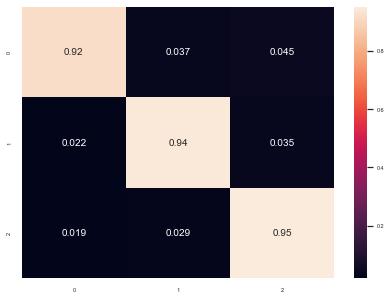

In [34]:
cm = confusion_matrix(y_test, pred_svm_poly) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(7,5))
sn.set(font_scale=0.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

In [35]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm_poly, target_names=target_names))
print()

f1_svm_poly = f1_score(y_test, pred_svm_poly, average='macro')
cross_val_svm_poly = np.mean(cross_val_score(svm_model_poly, X_train, y_train, cv=10))*100
print('F1-score is :', f1_svm_poly)
print('Cross validation score is :', cross_val_svm_poly)

              precision    recall  f1-score   support

     class 0       0.94      0.92      0.93       246
     class 1       0.90      0.94      0.92       231
     class 2       0.96      0.95      0.96       479

    accuracy                           0.94       956
   macro avg       0.94      0.94      0.94       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.9365816028633308
Cross validation score is : 95.1121076233184


## __Markdown table__

| Classifier             | Accuracy %  | F1-score | Cross validation |
|------------------------|-------------|----------|------------------|
| dummy                  | 50.1046     | 0.2225     | 52.6905          |
| Gaussian Naive Bayes   | 94.3514     | 0.9403     | 93.5426          |
| K Neirest Neighbors    | 85.9832     | 0.8519     | 88.4753          |
| Logistic Regression    | 94.6652     | 0.9411     | 93.7668          |
| Multi-Layer Perceptron | 95.3974     | 0.9492     | 94.2152          |
| SVM (kernel = rbf)  | 96.1297     | 0.9566     | 95.9192          |
| SVM (kernel = linear)  | 93.5146     | 0.9287     | 90. 9865         |
| SVM (kernel = poly)    | 94.1422     | 0.9365     | 95.1121          |

In [36]:
acc = [accuracy_dummy, accuracy_gnb, accuracy_knn, accuracy_logreg, accuracy_mlp, accuracy_svm, accuracy_svm_lin, accuracy_svm_poly]
f1 =[f1_dummy, f1_gnb, f1_knn, f1_logreg, f1_mlp, f1_svm, f1_svm_linear, f1_svm_poly]
classifiers = ['dummy', 'GNB', 'KNN', 'LOGREG', 'MLP', 'SVM(RBF)', 'SVM(LIN)', 'SVM(POLY)']     

## __Accuracy Bar plot__

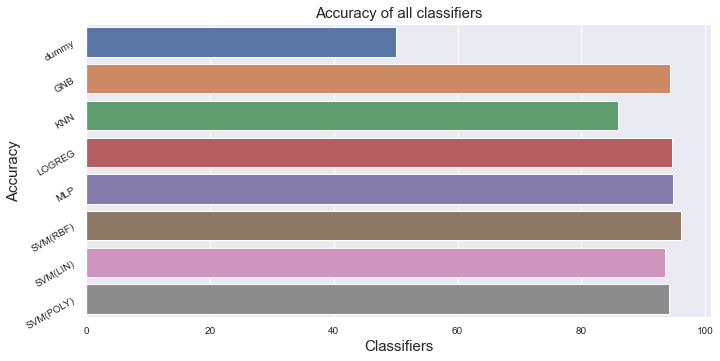

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Classifiers',fontsize = 15) #xlabel
ax.set_ylabel('Accuracy', fontsize = 15) #ylabel

plt.yticks(rotation=30, size = 10)
plt.xticks(rotation=0, size = 10)

ax = sn.barplot(x=acc, y=classifiers)
ax.set_title("Accuracy of all classifiers", fontsize= 15)


plt.tight_layout()
plt.show()

## __F1-score Bar plot__

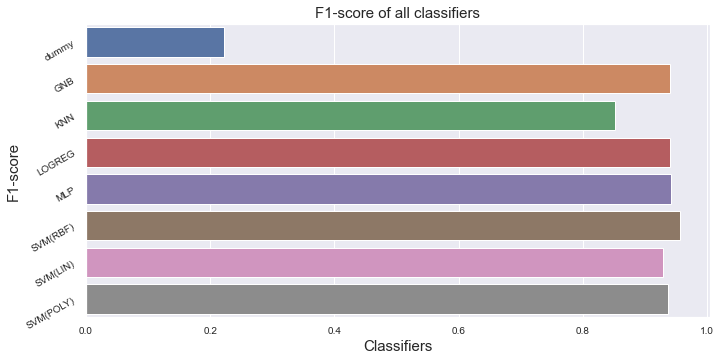

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Classifiers',fontsize = 15) #xlabel
ax.set_ylabel('F1-score', fontsize = 15) #ylabel

plt.yticks(rotation=30, size = 10)
plt.xticks(rotation=0, size = 10)

ax = sn.barplot(x=f1, y=classifiers)
ax.set_title("F1-score of all classifiers", fontsize= 15)


plt.tight_layout()
plt.show()

As we can see the dummy classifier has approximately 50% score, due to the imbalance of tha data. The best classifier is the SVM with rbf kernel. The KNN's performance isnt so good (except from the dummy one), due to the form of the data 

- ## Preprocessing 

- Imbalanced dataset Over Sampler

In [39]:
!pip install -U imbalanced-learn

In [40]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer ## MPOREI NA TO AFAIRESW AUTO!!

In [41]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Number of data samples is : ", len(X_train_ros))
print("Number of characteristics of each sample is ", len(X_train_ros[0]))
print("There exist {} classes in column {} of the dataset ".format(len (np.unique(y_train_ros)), len(y_train_ros) -1))
print("The labels of the classes are : {}" .format(np.unique(y_train_ros[:])))

Number of data samples is :  3525
Number of characteristics of each sample is  180
There exist 3 classes in column 3524 of the dataset 
The labels of the classes are : [0 1 2]


In [44]:
for i in range(len (np.unique(y_train_ros))):
    print("Class {} appers : {} times, with frequency {} %".format (i, np.count_nonzero(y_train_ros[:] == i), np.count_nonzero(y_train_ros[:] == i)/len(y_train_ros) * 100))

Class 0 appers : 1175 times, with frequency 33.33333333333333 %
Class 1 appers : 1175 times, with frequency 33.33333333333333 %
Class 2 appers : 1175 times, with frequency 33.33333333333333 %


- dummy

In [45]:
dummy = DummyClassifier().fit(X_train_ros, y_train_ros) 

pred_dummy = dummy.predict(X_test) 
  
accuracy_dummy = dummy.score(X_test, y_test) * 100 
print("Dummy Accuracy: {}% \n".format(accuracy_dummy))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_dummy, target_names=target_names))
print()

f1_dummy = f1_score(y_test, pred_dummy, average='macro')
cross_val_dummy = np.mean(cross_val_score(dummy, X_train_ros, y_train_ros, cv=10))*100
print('F1-score is :', f1_dummy)
print('Cross validation score is :', cross_val_dummy)

Dummy Accuracy: 25.732217573221757% 

              precision    recall  f1-score   support

     class 0       0.26      1.00      0.41       246
     class 1       0.00      0.00      0.00       231
     class 2       0.00      0.00      0.00       479

    accuracy                           0.26       956
   macro avg       0.09      0.33      0.14       956
weighted avg       0.07      0.26      0.11       956


F1-score is : 0.13643926788685523
Cross validation score is : 33.19155614215813


C:\Users\nanos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nanos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nanos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- GaussianNB

In [46]:
gnb = GaussianNB().fit(X_train_ros, y_train_ros) 

pred_gnb = gnb.predict(X_test) 
  
accuracy_gnb = gnb.score(X_test, y_test) *100 
print("GaussianNB Accuracy: {}% \n".format(accuracy_gnb))

cm = confusion_matrix(y_test, pred_gnb) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_gnb, target_names=target_names))
print()

f1_gnb = f1_score(y_test, pred_gnb, average='macro')
cross_val_gnb = np.mean(cross_val_score(gnb, X_train_ros, y_train_ros, cv=10))*100
print('F1-score is :', f1_gnb)
print('Cross validation score is :', cross_val_gnb)

GaussianNB Accuracy: 94.0376569037657% 

[[0.97154472 0.0203252  0.00813008]
 [0.02597403 0.94805195 0.02597403]
 [0.03966597 0.03966597 0.92066806]]
              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94       246
     class 1       0.90      0.95      0.92       231
     class 2       0.98      0.92      0.95       479

    accuracy                           0.94       956
   macro avg       0.93      0.95      0.94       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.9372455231183117
Cross validation score is : 94.9786730620654


- KNeighborsClassifier

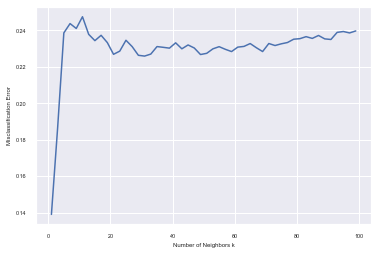

Optimal k is:  1
KNN Accuracy: 75.0%
              precision    recall  f1-score   support

     class 0       0.71      0.80      0.75       246
     class 1       0.64      0.89      0.74       231
     class 2       0.88      0.66      0.75       479

    accuracy                           0.75       956
   macro avg       0.74      0.78      0.75       956
weighted avg       0.78      0.75      0.75       956


F1-score is : 0.7492637382375148
Cross validation score is : 86.81037535410766


In [47]:
# training a KNN classifier 
myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2!=0, myList))
cv_scores = []
for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train_ros, y_train_ros, cv=10, scoring='f1_macro')
    cv_scores.append(scores.mean())
    
mean_error = [1-x for x in cv_scores]

plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

optimal_k = neighbors[mean_error.index(min(mean_error))]
print('Optimal k is: ', optimal_k)

knn_model = KNeighborsClassifier(n_neighbors = optimal_k, n_jobs=-1)
knn_model.fit(X_train_ros, y_train_ros)
pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_knn)*100
print("KNN Accuracy: {}%".format(accuracy_knn))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_knn, target_names=target_names))
print()

f1_knn = f1_score(y_test, pred_knn, average='macro')
cross_val_knn = np.mean(cross_val_score(knn_model, X_train_ros, y_train_ros, cv=10))*100
print('F1-score is :', f1_knn)
print('Cross validation score is :', cross_val_knn)

- LogisticRegression

In [48]:
with ignore_warnings(category=ConvergenceWarning):

    logreg = LogisticRegression()
    logreg.fit(X_train_ros, y_train_ros) 
    pred_logreg = logreg.predict(X_test) 
    accuracy_logreg = logreg.score(X_test, y_test) * 100
    print("LogisticRegression Accuracy: {}%".format(accuracy_logreg))

    target_names = ['class 0','class 1','class 2']
    print(classification_report(y_test, pred_logreg, target_names=target_names))
    print()

    f1_logreg = f1_score(y_test, pred_logreg, average='macro')
    cross_val_logreg = np.mean(cross_val_score(logreg, X_train_ros, y_train_ros, cv=10))*100
    print('F1-score is :', f1_logreg)
    print('Cross validation score is :', cross_val_logreg)

LogisticRegression Accuracy: 93.82845188284519%
              precision    recall  f1-score   support

     class 0       0.91      0.96      0.93       246
     class 1       0.88      0.93      0.90       231
     class 2       0.98      0.94      0.96       479

    accuracy                           0.94       956
   macro avg       0.93      0.94      0.93       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.9321737249057053
Cross validation score is : 96.79508434200359


- MLPClassifier

In [49]:
MLP_model = MLPClassifier()
MLP_model.fit(X_train_ros, y_train_ros)

pred_mlp = MLP_model.predict(X_test) 

accuracy_mlp = MLP_model.score(X_test, y_test) * 100
print("MLP Accuracy: {}%".format(accuracy_mlp))

with ignore_warnings(category=ConvergenceWarning):
    target_names = ['class 0','class 1','class 2']
    print(classification_report(y_test, pred_mlp, target_names=target_names))
    print()

    f1_mlp = f1_score(y_test, pred_mlp, average='macro')
    cross_val_mlp = np.mean(cross_val_score(MLP_model, X_train_ros, y_train_ros, cv=10))*100
    print('F1-score is :', f1_mlp)
    print('Cross validation score is :', cross_val_mlp)

MLP Accuracy: 94.0376569037657%
              precision    recall  f1-score   support

     class 0       0.92      0.95      0.93       246
     class 1       0.89      0.94      0.92       231
     class 2       0.98      0.94      0.96       479

    accuracy                           0.94       956
   macro avg       0.93      0.94      0.93       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.9349892970350178
Cross validation score is : 97.58925122328095


- SVMClassifier rbf_kernel

In [50]:
svm_model = SVC(probability=True)

svm_model.fit(X_train_ros, y_train_ros)
pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, pred_svm)*100
print("SVM Accuracy: {}%".format(accuracy_svm))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm, target_names=target_names))
print()

f1_svm = f1_score(y_test, pred_svm, average='macro')
cross_val_svm = np.mean(cross_val_score(svm_model, X_train_ros, y_train_ros, cv=10))*100
print('F1-score is :', f1_svm)
print('Cross validation score is :', cross_val_svm)

SVM Accuracy: 95.92050209205021%
              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       246
     class 1       0.92      0.96      0.94       231
     class 2       0.99      0.96      0.97       479

    accuracy                           0.96       956
   macro avg       0.95      0.96      0.95       956
weighted avg       0.96      0.96      0.96       956


F1-score is : 0.9542643225866563
Cross validation score is : 98.12821916044297


- SVMClassifier linear_kernel

In [51]:
#SVM Linear
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_ros, y_train_ros) 
pred_svm_lin = svm_model_linear.predict(X_test)  
accuracy_svm_lin = svm_model_linear.score(X_test, y_test) * 100
print("SVM Linear Accuracy: {}%".format(accuracy_svm_lin))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm_lin, target_names=target_names))
print()

f1_svm_linear = f1_score(y_test, pred_svm_lin, average='macro')
cross_val_svm_linear = np.mean(cross_val_score(svm_model_linear, X_train_ros, y_train_ros, cv=10))*100
print('F1-score is :', f1_svm_linear)
print('Cross validation score is :', cross_val_svm_linear)

SVM Linear Accuracy: 92.67782426778243%
              precision    recall  f1-score   support

     class 0       0.88      0.93      0.91       246
     class 1       0.90      0.90      0.90       231
     class 2       0.96      0.94      0.95       479

    accuracy                           0.93       956
   macro avg       0.92      0.92      0.92       956
weighted avg       0.93      0.93      0.93       956


F1-score is : 0.919187460213101
Cross validation score is : 96.51187870203451


- SVMClassifier polynomial_kernel

In [52]:
svm_model_poly = SVC(kernel='poly').fit(X_train_ros, y_train_ros) 

pred_svm_poly = svm_model_poly.predict(X_test) 
  
accuracy_svm_poly = svm_model_poly.score(X_test, y_test) * 100
print("SVM Poly Accuracy: {}%".format(accuracy_svm_poly))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm_poly, target_names=target_names))
print()

f1_svm_poly = f1_score(y_test, pred_svm_poly, average='macro')
cross_val_svm_poly = np.mean(cross_val_score(svm_model_poly, X_train_ros, y_train_ros, cv=10))*100
print('F1-score is :', f1_svm_poly)
print('Cross validation score is :', cross_val_svm_poly)

SVM Poly Accuracy: 94.24686192468619%
              precision    recall  f1-score   support

     class 0       0.94      0.92      0.93       246
     class 1       0.91      0.94      0.93       231
     class 2       0.96      0.95      0.96       479

    accuracy                           0.94       956
   macro avg       0.94      0.94      0.94       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.937599745440674
Cross validation score is : 98.07172289466907


- Markdown table

| Classifier             | Accuracy %  | F1-score | Cross validation % |
|------------------------|-------------|----------|------------------|
| dummy                  | 25.7322     | 0.1364     | 33.1915          |
| Gaussian Naive Bayes   | 94.0376     | 0.9372     | 94.9786          |
| K Neirest Neighbors    | 75.0000     | 0.7492     | 86.8103          |
| Logistic Regression    | 93.8284     | 0.9321     | 96.7950          |
| Multi-Layer Perceptron | 94.0376     | 0.9349     | 97.5892          |
| SVM (kernel = rbf)     | 95.9205     | 0.9542     | 98.1282          |
| SVM (kernel = linear)  | 92.6778     | 0.9191     | 96.5118         |
| SVM (kernel = poly)    | 94.2468     | 0.9375     | 98.0717          |

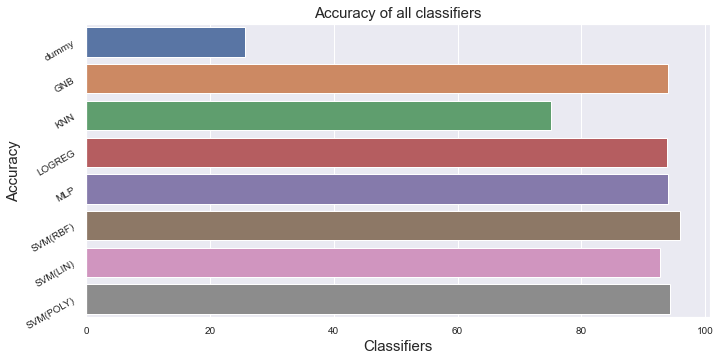

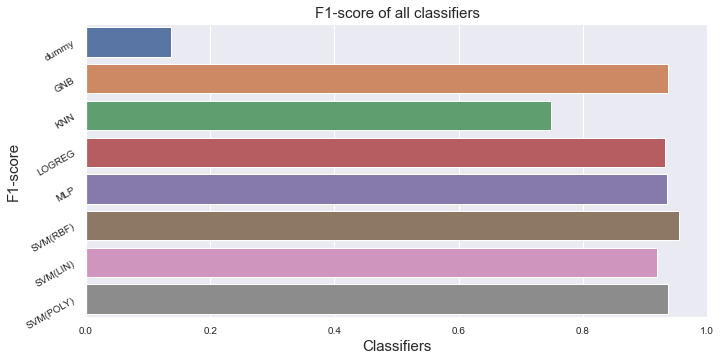

In [53]:
acc = [accuracy_dummy, accuracy_gnb, accuracy_knn, accuracy_logreg, accuracy_mlp, accuracy_svm, accuracy_svm_lin, accuracy_svm_poly]
f1 =[f1_dummy, f1_gnb, f1_knn, f1_logreg, f1_mlp, f1_svm, f1_svm_linear, f1_svm_poly]
classifiers = ['dummy', 'GNB', 'KNN', 'LOGREG', 'MLP', 'SVM(RBF)', 'SVM(LIN)', 'SVM(POLY)']  

#accuracy bar plot
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Classifiers',fontsize = 15) #xlabel
ax.set_ylabel('Accuracy', fontsize = 15) #ylabel

plt.yticks(rotation=30, size = 10)
plt.xticks(rotation=0, size = 10)

ax = sn.barplot(x=acc, y=classifiers)
ax.set_title("Accuracy of all classifiers", fontsize= 15)


plt.tight_layout()
plt.show()

#f1-score bar plot
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Classifiers',fontsize = 15) #xlabel
ax.set_ylabel('F1-score', fontsize = 15) #ylabel

plt.yticks(rotation=30, size = 10)
plt.xticks(rotation=0, size = 10)

ax = sn.barplot(x=f1, y=classifiers)
ax.set_title("F1-score of all classifiers", fontsize= 15)


plt.tight_layout()
plt.show()

Except of the dummy classifier we see an increase at the scores due to oversampling

- Reqularization of features 

Standard Scaler

In [54]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train_ros)
X_train_scaled = preprocessing.scale(X_train_ros)
X_test_scaled = scaler.transform(X_test)

C:\Users\nanos\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\nanos\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


- dummy

In [55]:
dummy = DummyClassifier().fit(X_train_scaled, y_train_ros) 

pred_dummy = dummy.predict(X_test_scaled) 
  
accuracy_dummy = dummy.score(X_test_scaled, y_test) * 100 
print("Dummy Accuracy: {}% \n".format(accuracy_dummy))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_dummy, target_names=target_names))
print()

f1_dummy = f1_score(y_test, pred_dummy, average='macro')
cross_val_dummy = np.mean(cross_val_score(dummy, X_train_scaled, y_train_ros, cv=10))*100
print('F1-score is :', f1_dummy)
print('Cross validation score is :', cross_val_dummy)

Dummy Accuracy: 25.732217573221757% 

              precision    recall  f1-score   support

     class 0       0.26      1.00      0.41       246
     class 1       0.00      0.00      0.00       231
     class 2       0.00      0.00      0.00       479

    accuracy                           0.26       956
   macro avg       0.09      0.33      0.14       956
weighted avg       0.07      0.26      0.11       956


F1-score is : 0.13643926788685523
Cross validation score is : 33.19155614215813


C:\Users\nanos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nanos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nanos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- GaussianNB

In [56]:
gnb = GaussianNB().fit(X_train_scaled, y_train_ros) 

pred_gnb = gnb.predict(X_test_scaled) 
  
accuracy_gnb = gnb.score(X_test_scaled, y_test) *100 
print("GaussianNB Accuracy: {}% \n".format(accuracy_gnb))

cm = confusion_matrix(y_test, pred_gnb) 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_gnb, target_names=target_names))
print()

f1_gnb = f1_score(y_test, pred_gnb, average='macro')
cross_val_gnb = np.mean(cross_val_score(gnb, X_train_scaled, y_train_ros, cv=10))*100
print('F1-score is :', f1_gnb)
print('Cross validation score is :', cross_val_gnb)

GaussianNB Accuracy: 94.0376569037657% 

[[0.97154472 0.0203252  0.00813008]
 [0.02597403 0.94805195 0.02597403]
 [0.03966597 0.03966597 0.92066806]]
              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94       246
     class 1       0.90      0.95      0.92       231
     class 2       0.98      0.92      0.95       479

    accuracy                           0.94       956
   macro avg       0.93      0.95      0.94       956
weighted avg       0.94      0.94      0.94       956


F1-score is : 0.9372455231183117
Cross validation score is : 95.0070821529745


- KNeighborsClassifier

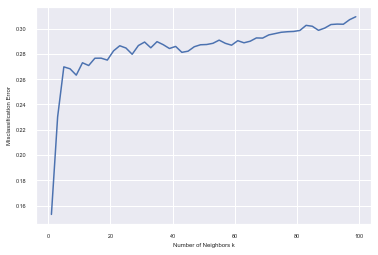

Optimal k is:  1
KNN Accuracy: 73.9539748953975%
              precision    recall  f1-score   support

     class 0       0.71      0.78      0.74       246
     class 1       0.61      0.90      0.73       231
     class 2       0.90      0.64      0.75       479

    accuracy                           0.74       956
   macro avg       0.74      0.77      0.74       956
weighted avg       0.78      0.74      0.74       956


F1-score is : 0.7382792302046749
Cross validation score is : 85.61920551120268


In [57]:
# training a KNN classifier 
myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2!=0, myList))
cv_scores = []
for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train_scaled, y_train_ros, cv=10, scoring='f1_macro')
    cv_scores.append(scores.mean())
    
mean_error = [1-x for x in cv_scores]

plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

optimal_k = neighbors[mean_error.index(min(mean_error))]
print('Optimal k is: ', optimal_k)

knn_model = KNeighborsClassifier(n_neighbors = optimal_k, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train_ros)
pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, pred_knn)*100
print("KNN Accuracy: {}%".format(accuracy_knn))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_knn, target_names=target_names))
print()

f1_knn = f1_score(y_test, pred_knn, average='macro')
cross_val_knn = np.mean(cross_val_score(knn_model, X_train_scaled, y_train_ros, cv=10))*100
print('F1-score is :', f1_knn)
print('Cross validation score is :', cross_val_knn)

- LogisticRegression

In [58]:
with ignore_warnings(category=ConvergenceWarning):

    logreg = LogisticRegression()
    logreg.fit(X_train_scaled, y_train_ros) 
    pred_logreg = logreg.predict(X_test_scaled) 
    accuracy_logreg = logreg.score(X_test_scaled, y_test) * 100
    print("LogisticRegression Accuracy: {}%".format(accuracy_logreg))

    target_names = ['class 0','class 1','class 2']
    print(classification_report(y_test, pred_logreg, target_names=target_names))
    print()

    f1_logreg = f1_score(y_test, pred_logreg, average='macro')
    cross_val_logreg = np.mean(cross_val_score(logreg, X_train_scaled, y_train_ros, cv=10))*100
    print('F1-score is :', f1_logreg)
    print('Cross validation score is :', cross_val_logreg)

LogisticRegression Accuracy: 92.78242677824268%
              precision    recall  f1-score   support

     class 0       0.90      0.94      0.92       246
     class 1       0.88      0.91      0.90       231
     class 2       0.97      0.93      0.95       479

    accuracy                           0.93       956
   macro avg       0.92      0.93      0.92       956
weighted avg       0.93      0.93      0.93       956


F1-score is : 0.9212562832032959
Cross validation score is : 96.93729075457121


- MLPClassifier

In [59]:
MLP_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15, 10, 5), random_state=1)
MLP_model.fit(X_train_scaled, y_train_ros)

pred_mlp = MLP_model.predict(X_test_scaled) 

accuracy_mlp = MLP_model.score(X_test_scaled, y_test) * 100
print("MLP Accuracy: {}%".format(accuracy_mlp))

with ignore_warnings(category=ConvergenceWarning):
    target_names = ['class 0','class 1','class 2']
    print(classification_report(y_test, pred_mlp, target_names=target_names))
    print()

    f1_mlp = f1_score(y_test, pred_mlp, average='macro')
    cross_val_mlp = np.mean(cross_val_score(MLP_model, X_train_scaled, y_train_ros, cv=10))*100
    print('F1-score is :', f1_mlp)
    print('Cross validation score is :', cross_val_mlp)

MLP Accuracy: 92.67782426778243%
              precision    recall  f1-score   support

     class 0       0.90      0.94      0.92       246
     class 1       0.89      0.94      0.91       231
     class 2       0.97      0.91      0.94       479

    accuracy                           0.93       956
   macro avg       0.92      0.93      0.92       956
weighted avg       0.93      0.93      0.93       956


F1-score is : 0.9231627661546798
Cross validation score is : 96.88055305176408


- SVMClassifier rbf_kernel

In [60]:
svm_model = SVC(probability=True)

svm_model.fit(X_train_scaled, y_train_ros)
pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, pred_svm)*100
print("SVM Accuracy: {}%".format(accuracy_svm))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm, target_names=target_names))
print()

f1_svm = f1_score(y_test, pred_svm, average='macro')
cross_val_svm = np.mean(cross_val_score(svm_model, X_train_scaled, y_train_ros, cv=10))*100
print('F1-score is :', f1_svm)
print('Cross validation score is :', cross_val_svm)

SVM Accuracy: 96.02510460251045%
              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       246
     class 1       0.93      0.96      0.94       231
     class 2       0.99      0.96      0.97       479

    accuracy                           0.96       956
   macro avg       0.95      0.96      0.96       956
weighted avg       0.96      0.96      0.96       956


F1-score is : 0.9556355914701241
Cross validation score is : 98.09981006953386


- SVMClassifier linear_kernel

In [61]:
#SVM Linear
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train_ros) 
pred_svm_lin = svm_model_linear.predict(X_test_scaled)  
accuracy_svm_lin = svm_model_linear.score(X_test_scaled, y_test) * 100
print("SVM Linear Accuracy: {}%".format(accuracy_svm_lin))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm_lin, target_names=target_names))
print()

f1_svm_linear = f1_score(y_test, pred_svm_lin, average='macro')
cross_val_svm_linear = np.mean(cross_val_score(svm_model_linear, X_train_scaled, y_train_ros, cv=10))*100
print('F1-score is :', f1_svm_linear)
print('Cross validation score is :', cross_val_svm_linear)

SVM Linear Accuracy: 92.46861924686193%
              precision    recall  f1-score   support

     class 0       0.88      0.95      0.91       246
     class 1       0.90      0.89      0.90       231
     class 2       0.97      0.93      0.95       479

    accuracy                           0.92       956
   macro avg       0.91      0.92      0.92       956
weighted avg       0.93      0.92      0.93       956


F1-score is : 0.9175389781837805
Cross validation score is : 96.45514099922741


- SVMClassifier polynomial_kernel

In [62]:
svm_model_poly = SVC(kernel='poly').fit(X_train_scaled, y_train_ros) 

pred_svm_poly = svm_model_poly.predict(X_test_scaled) 
  
accuracy_svm_poly = svm_model_poly.score(X_test_scaled, y_test) * 100
print("SVM Poly Accuracy: {}%".format(accuracy_svm_poly))

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, pred_svm_poly, target_names=target_names))
print()

f1_svm_poly = f1_score(y_test, pred_svm_poly, average='macro')
cross_val_svm_poly = np.mean(cross_val_score(svm_model_poly, X_train_scaled, y_train_ros, cv=10))*100
print('F1-score is :', f1_svm_poly)
print('Cross validation score is :', cross_val_svm_poly)

SVM Poly Accuracy: 89.01673640167364%
              precision    recall  f1-score   support

     class 0       0.99      0.70      0.82       246
     class 1       0.93      0.89      0.91       231
     class 2       0.84      0.99      0.91       479

    accuracy                           0.89       956
   macro avg       0.92      0.86      0.88       956
weighted avg       0.90      0.89      0.89       956


F1-score is : 0.8804161353447211
Cross validation score is : 97.3929629152717


| Classifier             | Accuracy %  | F1-score | Cross validation % |
|------------------------|-------------|----------|------------------|
| dummy                  | 25.7322     | 0.1364     | 33.1915          |
| Gaussian Naive Bayes   | 94.0376     | 0.9372     | 95.0070          |
| K Neirest Neighbors    | 73.9539     | 0.7382     | 85.6192          |
| Logistic Regression    | 92.7824     | 0.9212    | 96.9372          |
| Multi-Layer Perceptron | 92.6778     | 0.9231     | 96.8805          |
| SVM (kernel = rbf)     |  96.0251     | 0.9556     | 98.0998          |
| SVM (kernel = linear)  | 92.4686     |0.9175     | 96.4551          |
| SVM (kernel = poly)    | 89.0167     | 0.8804     |  97.3929         |

The scaling hasnt help any model improve. We observe a slight reduction in the scores, especially in the SVM poly kernel model

GridsearchCV

## __KNeighborsClassifier()__

In [64]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn import neighbors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import time
n_components = [1, 10, 20, 40, 100, 180]
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

In [65]:
n_components = [1, 10, 20, 40, 100, 180]
k = list(range(1, 180))
clf = neighbors.KNeighborsClassifier(n_jobs=-1) 
metrics = ['euclidean', 'minkowski', 'manhattan']
weight_options = ['uniform', 'distance']
param_grid = dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__metric = metrics, kNN__weights = weight_options)
pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf) ])
estimator = GridSearchCV(pipe, param_grid , cv=10, scoring='f1_macro', n_jobs=-1) 
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Total time fit and predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
#print(estimator.cv_results_)
print(estimator.best_score_)
print(estimator.best_params_)

print(estimator.get_params().keys())

Total time fit and predict: 1947.5439858436584 seconds
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       246
           1       0.81      0.92      0.86       231
           2       0.93      0.88      0.90       479

    accuracy                           0.88       956
   macro avg       0.87      0.89      0.88       956
weighted avg       0.89      0.88      0.89       956

0.8936072447751158
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 49, 'kNN__weights': 'distance', 'pca__n_components': 10}
dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__sampler', 'estimator__pca', 'estimator__kNN', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__sampler__random_state', 'estimator__sampler__sampling_strategy', 'estimator__sampler__shrinkage', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estima

## __LogisticRegression()__

In [68]:
with ignore_warnings(category=ConvergenceWarning):
    solvers = ["newton-cg", "sag", "saga", "lbfgs"]
    penalty = ['l2']
    C = [0.001,.009,0.01,.09,1,5,10,25]
    #param_grid = dict(pca__n_components = n_components, LogisticRegression__penalty = penalty, LogisticRegression__solver = solvers, LogisticRegression__C = C)
    param_grid = dict(pca__n_components=n_components, LogisticRegression__penalty = penalty, LogisticRegression__solver = solvers, LogisticRegression__C = C)
    clf = LogisticRegression(n_jobs=-1)
    #pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('LogisticRegression', clf) ], memory = 'tmp')
    pipe = Pipeline([('scaler', scaler), ('pca', pca), ('LogisticRegression' , clf)])
    estimator = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
    start_time = time.time()
    estimator.fit(X_train_ros, y_train_ros)
    preds = estimator.predict(X_test)
    print("Total time fit and predict: %s seconds" % (time.time() - start_time))
    print(classification_report(y_test, preds))
    print(estimator.best_score_)
    print(estimator.best_params_)

Total time fit and predict: 199.4397783279419 seconds
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       246
           1       0.88      0.90      0.89       231
           2       0.96      0.93      0.95       479

    accuracy                           0.93       956
   macro avg       0.92      0.92      0.92       956
weighted avg       0.93      0.93      0.93       956

0.9695277845283045
{'LogisticRegression__C': 1, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'sag', 'pca__n_components': 180}


## __GaussianNB()__

In [69]:
smooth = [1e-20, 1e-14, 1e-13, 1e-08, 1e-07]
param_grid = dict(GaussianNB__var_smoothing= smooth)
clf = GaussianNB()
pipe = Pipeline(steps=[('scaler', scaler), ('GaussianNB', clf) ])
estimator = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_ros, y_train_ros)
preds = estimator.predict(X_test)
print("Total time fit and predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print(estimator.best_score_)
print(estimator.best_params_)

Total time fit and predict: 0.6963467597961426 seconds
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       246
           1       0.90      0.95      0.92       231
           2       0.98      0.92      0.95       479

    accuracy                           0.94       956
   macro avg       0.93      0.95      0.94       956
weighted avg       0.94      0.94      0.94       956

0.9517893759152202
{'GaussianNB__var_smoothing': 1e-07}


## __Multi-Layer Perceptron__()

In [71]:
solver = ['lbfgs', 'sgd', 'adam']
hidden_layers = [(10,), (20,), (100,)]
learning_rate = ['constant', 'adaptive']
alpha = [0.0001, 0.005, 0.05]
param_grid = dict(pca__n_components=n_components, MLP__learning_rate = learning_rate, MLP__hidden_layer_sizes = hidden_layers, MLP__solver = solver, MLP__alpha = alpha)
clf = MLPClassifier()
pipe = Pipeline(steps=[('pca', pca), ('MLP', clf) ], memory = 'tmp')
estimator = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_ros, y_train_ros)
preds = estimator.predict(X_test)
print("Total time fit and predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print(estimator.best_score_)
print(estimator.best_params_)

Total time fit and predict: 1328.870459318161 seconds
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       246
           1       0.92      0.95      0.94       231
           2       0.98      0.95      0.97       479

    accuracy                           0.96       956
   macro avg       0.95      0.96      0.96       956
weighted avg       0.96      0.96      0.96       956

0.9792031777766604
{'MLP__alpha': 0.005, 'MLP__hidden_layer_sizes': (100,), 'MLP__learning_rate': 'adaptive', 'MLP__solver': 'adam', 'pca__n_components': 180}


## __SVMClassifier()__

In [73]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
#kernel = ['rbf', 'linear', 'poly', 'sigmoid', 'precomputed']  
kernel = ['rbf']
param_grid = dict( pca__n_components=n_components, SVC__kernel = kernel, SVC__C = C, SVC__gamma = gamma)
clf = SVC()
pipe = Pipeline(steps=[('pca', pca), ('SVC', clf) ])
estimator = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train_ros, y_train_ros)
preds = estimator.predict(X_test)
print("Total time fit and predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print(estimator.best_score_)
print(estimator.best_params_)

Total time fit and predict: 401.87223267555237 seconds
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       246
           1       0.93      0.92      0.93       231
           2       0.91      0.98      0.94       479

    accuracy                           0.93       956
   macro avg       0.93      0.91      0.92       956
weighted avg       0.93      0.93      0.93       956

0.9813335153232622
{'SVC__C': 100, 'SVC__gamma': 0.1, 'SVC__kernel': 'rbf', 'pca__n_components': 100}


SVM with other kernels than rbf never ended and timed out the kernel 

| Classifier             | Accuracy   | F1-score | Improvement % | Time (sec)|
|------------------------|------------|----------|---------------|-----------|
| Gaussian Naive Bayes   | 0.9517893759152202     | 0.94     | 1.00877 |  0.6963 |     
| K Neirest Neighbors    | 0.8936072447751158     | 0.88     | 1.03928 |  1947.5439|     
| Logistic Regression    | 0.9695277845283045     | 0.93     | 1.02416 | 199.4397|       
| Multi-Layer Perceptron | 0.9792031777766604     | 0.96     | 1.02644 | 1328.8704|      
| SVM (kernel = rbf)     | 0.9813335153232622     | 0.93     | 1.0208 | 401.8722|          

We observe that the best score is achieved in the SVM classifier. Grid search has helped a lot the K-NN classifier to improve, and as he has the biggest increment of all after the grid search. We we definately choose SVM with rbf kernel as he has the best score which is quite high, even in the out of the box performance.